# Modelo de Predicción de Rotación de Empleados 

#### Autor: Dalaí Serrano Alavez

#### Likedin: https://www.linkedin.com/in/dalser/

#### email: dalai.dsa@gmail.com

#### Fuente: Datacamp - Human Resources Analytics: Predicting Employee Churn in Python

## 1. Explorar, manipular, transformar y análizar los datos

In [1]:
## Input
# Se cargan las librerías

# Paso 0
# Explorar y transformar los datos
import pandas as pd

# Paso 1
# Vizualización de la correlación lineal
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 3
# Modelo predictivo
from sklearn.model_selection import train_test_split

# Paso 4
# Algoritmo del árbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Visualización del árbol de decisión
from sklearn.tree import export_graphviz
from sklearn import tree
# Visualizar el árbol de decisiones con graphviz
from dtreeviz.trees import *

# Importar la función para calcular la puntación de precisión
from sklearn.metrics import precision_score

# Importar la función para calcular la puntuación de recuperación
from sklearn.metrics import recall_score

# Importar la función para calcular la puntuación ROC/AUC
from sklearn.metrics import roc_auc_score

# Importar la función para implementar la validación cruzada
from sklearn.model_selection import cross_val_score

# Importar la función GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
## Trasnformación del dataset

# Cargamos el archivo CSV y obtenemos la información del dataset
data0 = pd.read_csv('C:/Users/dalse/Documents/RyS/Datacamp/HRAnalyticsInPython/Input/turnover.csv')

# Visualizar las primeras filas del dataframe
data0.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Obtener el tipo de varibles del dataset 'turnover'
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Tranformar el dtype object de los campos 
# department (variable nominal) y salary (variable ordinal)

valores_department = data0.department.unique()

valores_salary = data0.salary.unique()

# Imprimir valores únicos de los campos salary y department
print(
    f"Valores únicos en 'salary': {valores_salary}",
    f"Valores únicos en 'departament': {valores_department}",
    sep = '\n'
    )

Valores únicos en 'salary': ['low' 'medium' 'high']
Valores únicos en 'departament': ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


### Transformar variables categóricas 'salary' y 'department'

In [5]:
# Cambiar el tipo del campo salary a categorical
data0.salary = data0.salary.astype('category')

# # Crear el orden correcto de categorías
data0.salary = data0.salary.cat.reorder_categories(['low', 'medium', 'high'])

# # Devuelve las categorias con valores numéricos
data0.salary = data0.salary.cat.codes

In [6]:
# Transformar y obtener el dataframe departments desde la variable nominal 'department',
# utilizando las variables ficticias
departments = pd.get_dummies(data0.department)

departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [7]:
# Borrar la columna 'accounting'
departments = departments.drop("accounting", axis=1)

# Elimina la columna 'department' porque ya no será necesaria
data1 = data0.drop("department", axis=1)

# Unir el el dataframe "departments" con el dataset de empleados
# Se crean las columnas de los departamentos excepto por el departamento 'accounting'
data1 = data0.join(departments)
data1

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,0,0,0,0,0,0,0,0,1,0


### Índice de Rotación de Empleados

In [8]:
# Obtener el numero total de observaciones (filas) en %
n_employees = len(data1)

# Obtener el número de empleados que se mantienen en sus puestos y los que se dieron de baja
data1.churn.value_counts()

# Porcentaje de empleados activos(0)/baja(1)
Ind_Rot_Emp = data1.churn.value_counts()/n_employees*100

Ind_Rot_Emp

0    76.191746
1    23.808254
Name: churn, dtype: float64

### Correlación de rotación de empleados

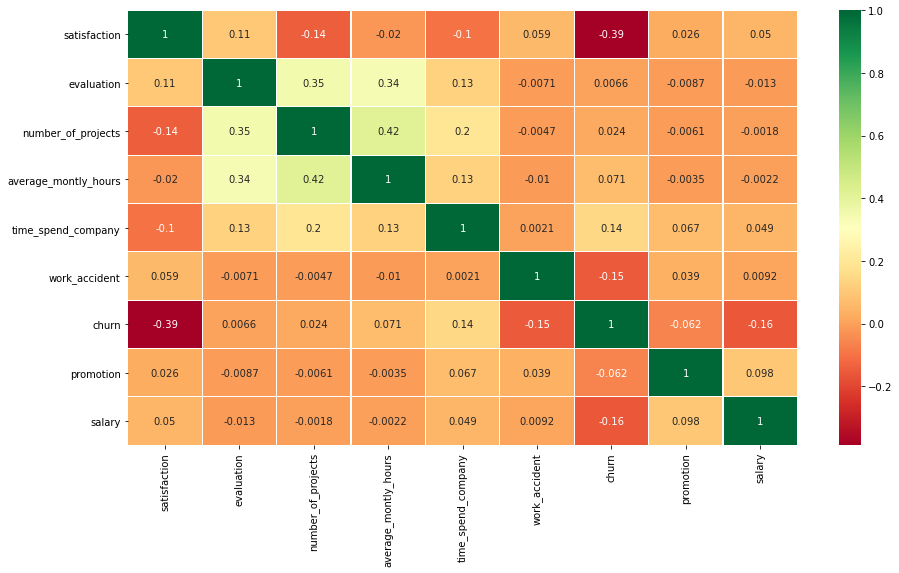

In [9]:
# Eliminamos las columnas de los departamentos
data2 = data1.drop(['IT','RandD','hr','management','marketing','product_mng','sales', 'support','technical'], axis=1)

# Creamos la variable de la Correlación de las campos del dataframe 'data' con el método *corr()*
corr_matrix = data2.corr()

# Gráfico de 'mapa de calor', con los parámetros: mostrar datos, ancho de línea y secuencia de colores
plot_heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=.1,
    cmap="RdYlGn"
    )

# Cambiar tamaño del mapa de calor
plt.gcf().set_size_inches(15,8)

## Primer Hallazgo

#### En el gráfico se muestra que el coeficiente de correlación es negativo (-0.39) entre la satisfacción y la rotación del personal.
#### Indica que a > satisfacción del empleado, menos probable será que se marche de la empresa.

## 2. Modelo de Predicción de Rotación

### División de datos: Train/test split 

In [10]:
# Crear los dataframes de 'target' y 'features'

# Definir el dataframe de la variable dependiente (churn)
target = data0.churn

# Definir el dataframe de las variables independientes
features = data0.drop(['churn','department'], axis=1)

### Limitar la produndidad máxima del árbol de decisión

### Decision Tree classification

In [11]:
# Usamos la función para crear las divisiones tanto para el 'target' como para 'features'
# Establecer la muestra de la prueba para que sea el 25 % de sus observaciones
target_train, target_test, features_train, features_test = train_test_split(
    target,
    features,
    test_size=0.25,
    random_state=42
    )

## 3. Evaluación del modelo de predicción de rotación

### Precisión de la predicción

#### Problema de sobreajuste

In [12]:
# Iniciar el modelo ajustando el parámetro 'ramdom_state'
model = DecisionTreeClassifier(random_state=42)

# Aplicar un modelo de árbol de decisión para ajustar
# las características al objetivo en el conjunto de entrenamiento
model.fit(features_train, target_train)

# Verificar la puntuación de precisión de la predicción para el conjunto de entrenamiento
score_train = model.score(features_train, target_train) * 100

# Verificar la puntuación de precisión de la predicción para el conjunto de prueba
score_test =model.score(features_test, target_test) * 100

columns = list()

# Exportar el árbol de decisión al formato 'dot'
export_graphviz(model,"tree.dot")

print(
    'Sobreajuste:',
    f'-> Precisión del conjunto de entrenamiento: {score_train}',
    f'-> Precisión del conjunto de prueba: {score_test}',
    sep='\n'
    )

Sobreajuste:
-> Precisión del conjunto de entrenamiento: 100.0
-> Precisión del conjunto de prueba: 97.52


### Limitar la produndidad máxima del árbol de decisión

In [13]:
# Iniciar el modelo ajustando el parámetro 'ramdom_state'
model_prof_5 = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
    )

# Aplicar un modelo de árbol de decisión para ajustar
# las características al objetivo en el conjunto de entrenamiento
model_prof_5.fit(features_train, target_train)

# Verificar la puntuación de precisión de la predicción para el conjunto de entrenamiento
score_train = round(model_prof_5.score(features_train, target_train) * 100, 2)

# Verificar la puntuación de precisión de la predicción para el conjunto de prueba
score_test = round(model_prof_5.score(features_test, target_test) * 100, 2)

# Exportar el árbol de decisión al formato 'dot'
export_graphviz(model_prof_5,"tree_prof.dot")

print(
    'Límite máximo de profundidad:',
    f'-> Precisión del conjunto de entrenamiento: {score_train}',
    f'-> Precisión del conjunto de prueba: {score_test}',
    sep='\n'
    )

Límite máximo de profundidad:
-> Precisión del conjunto de entrenamiento: 97.69
-> Precisión del conjunto de prueba: 97.12


### Limitar al mínimo la muestra en cada hoja del árbol de decisión

In [14]:
# Iniciar el modelo ajustando el parámetro 'ramdom_state'
model_min_muestra = DecisionTreeClassifier(
    min_samples_leaf=100,
    random_state=42
    )

# Aplicar un modelo de árbol de decisión para ajustar
# las características al objetivo en el conjunto de entrenamiento
model_min_muestra.fit (features_train, target_train)

# Verificar la puntuación de precisión de la predicción para el conjunto de entrenamiento
score_train = round(model_min_muestra.score (features_train, target_train) * 100, 2)

# Verificar la puntuación de precisión de la predicción para el conjunto de prueba
score_test = round(model_min_muestra.score (features_test, target_test) * 100, 2)

# Exportar el árbol de decisión al formato 'dot'
export_graphviz(model_min_muestra,"tree_muestra.dot")

print(
    'Límite mínimo de la muestra por hoja:',
    f'-> Precisión del conjunto de entrenamiento: {score_train}',
    f'-> Precisión del conjunto de prueba: {score_test}',
    sep='\n'
    )

Límite mínimo de la muestra por hoja:
-> Precisión del conjunto de entrenamiento: 96.58
-> Precisión del conjunto de prueba: 96.13


### Evaluación del Modelo

#### Cálculo de las métricas de exactitud: precisión
#### Falsos Positoos(FP)

In [15]:
# Predecir si los empleados abandonarán utilizando el conjunto de prueba
prediction = model.predict (features_test)

# Calcula la puntuación de precisión comparando target_test con la predicción
round(precision_score(target_test, prediction)*100, 2)

93.51

#### Cálculo de métricas de precisión: recuperación
#### Falsos Negativos (FN)

In [16]:
# Utilizar el modelo inicial para predecir la deserción
prediction = model.predict(features_test)

# Calcular la puntuación de recuperación comparando target_test con la predicción
puntuacion_rec = round(recall_score(target_test, prediction)*100,2)

puntuacion_rec

96.32

#### Cálculo de la puntuación ROC/AUC
##### La combinación de esos dos resultados en la curva ROC nos permite medir tanto el recuerdo como la precisión. El área bajo la curva ROC se calcula como la puntuación AUC.

In [17]:
# Usar el modelo inicial para predecir la deserción (basado en features_test)
predicción = model.predict (features_test)

# Calcular la puntuación ROC / AUC comparando target_test con la predicción
puntuacion_roc_auc = round(roc_auc_score (target_test, predicción)*100,2)

puntuacion_roc_auc

97.11

#### Equilibrio de clases

In [18]:
# Inicializar el DecisionTreeClassifier
model_depth_5_b = DecisionTreeClassifier(
    max_depth = 5,
    class_weight = "balanced",
    random_state = 42
    )

# Encajar el modelo
model_depth_5_b.fit (features_train, target_train)

# Obtener la recisión de la predicción para el conjunto de prueba
model_depth_5_b = round(model_depth_5_b.score(features_test, target_test)*100,2)

model_depth_5_b

93.57

#### Comparación de los modelos de abandono de los empleados

In [19]:
# Inicializar el modelo con un máximo de profundidad de 7 niveles
model_depth_7_b = DecisionTreeClassifier(max_depth = 7,
class_weight = "balanced",
random_state = 42
)
# Ajústelo al componente de entrenamiento
model_depth_7_b.fit(features_train, target_train)

# Hacer predicciones usando el componente de prueba
prediction_b = model_depth_7_b.predict(features_test)

puntuacion_model_bal = round(recall_score(target_test, prediction_b),2)*100

puntuacion_model_roc_auc = round(roc_auc_score(target_test, prediction_b),2)*100

# Puntuación de recuperación y la puntuación ROC / AUC
print(
    f'Puntación de Recuperación: {puntuacion_rec}',
    f'Puntación ROC/AUC: {puntuacion_roc_auc}',
    sep = '\n'
    )

# Puntuación de recuperación del modelo balanceado
# y la puntación ROC/AUC para el modelo balanceado
print(
    f'Puntuación de recuperación del modelo equilibrado: {puntuacion_model_bal}',
    f'Puntuación ROC/AUC para el modelo equilibrado: {puntuacion_roc_auc}',
    sep = '\n'
    )

Puntación de Recuperación: 96.32
Puntación ROC/AUC: 97.11
Puntuación de recuperación del modelo equilibrado: 93.0
Puntuación ROC/AUC para el modelo equilibrado: 97.11


## 4. Elegir el mejor modelo de predicción de rotación

### Validación cruzada con sklearn

In [20]:
# Utilice esa función para imprimir la puntuación de validación cruzada para 10 pliegues
validacion_cruzada = cross_val_score(model,features,target,cv=10)

validacion_cruzada

array([0.98333333, 0.982     , 0.97333333, 0.96266667, 0.95733333,
       0.974     , 0.988     , 0.992     , 1.        , 1.        ])

#### Configuración de los parámetros de GridSearch

In [21]:
# Generar valores para máxima profundidad
depth = [i for i in range(5,21,1)]

# Generar valores para el tamaño mínimo de la muestra
samples = [i for i in range(50,500,50)]

# Crear el diccionario con los parámetros a verificar
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# Configurar parámetros del diccionario
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# Ajustar la función GridSearchCV con el modelo inicial y los parámetros anteriores
param_search = GridSearchCV(model, parameters)

# Ajustar param_search al conjunto de datos de entrenamiento
param_search.fit(features_train, target_train)

print(f'Mejores parámetros para el modelo: {param_search.best_params_}')

Mejores parámetros para el modelo: {'max_depth': 5, 'min_samples_leaf': 50}


#### Clasificación de las características importantes

In [23]:
# Configurar los parámetros del mejor modelo
model_best = DecisionTreeClassifier(
    max_depth=8,
    min_samples_leaf=150,
    class_weight="balanced",
    random_state=42
    )

# Ajustar el modelo usando solo las características seleccionadas del conjunto de entrenamiento
model_best.fit(features_train, target_train)

# Calcular la importancia de las características
feature_importances = model_best.feature_importances_

# Crear una lista de características
feature_list = list(features)

# Crear el dataframe con el índice de características
relative_importances = pd.DataFrame(
    index=feature_list,
    data=feature_importances,
    columns=["importance"]
    )

# Ordenar los valores del dataframe 'relative_importances' de manera descendente
relative_importances.sort_values(
    by="importance",
    ascending=False
    )

,importance
satisfaction,0.481711
time_spend_company,0.358765
evaluation,0.088027
average_montly_hours,0.038531
number_of_projects,0.032966
work_accident,0.000000
promotion,0.000000
salary,0.000000


#### Selección de características importantes

In [24]:
# Seleccionar solo características con uan importancia relativa superior al 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# Crear una lista de esas características
selected_list = selected_features.index

# transformar los componentes 'features_train' y 'features_test' para incluir solo las características seleccionadas
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

#### Desarrollar y probar el mejor modelo

In [26]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test)*100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best)*100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best)*100)

95.28
91.75027870680044
94.07002193314084
